In [2]:
import pandas as pd

In [5]:
pad = pd.read_csv('C:\SMU\DataFest\selected\Price_and_Availability_Data.csv')
leases = pd.read_csv('C:\SMU\DataFest\selected\Leases.csv')
mmod = pd.read_csv('C:\SMU\DataFest\selected\Major_Market_Occupancy_Data.csv')
unemployment = pd.read_csv('C:\SMU\DataFest\selected\Unemployment.csv')
print("Price and Availability\n", pad.head())
print("Leases\n", leases.head())
print("Major Market Occupancy\n", mmod.head())
print("Unemployment\n", unemployment.head())

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 50-51: truncated \UXXXXXXXX escape (2893371532.py, line 4)

In [8]:
missing_percent = mmod.isnull().mean() * 100
print(missing_percent)

year                             0.0
quarter                          0.0
market                           0.0
ending_occupancy_proportion      0.0
starting_occupancy_proportion    0.0
avg_occupancy_proportion         0.0
dtype: float64


In [20]:
missing_percent = leases.isnull().mean() * 100
print(missing_percent)

year                               0.000000
quarter                            0.000000
monthsigned                        0.443280
market                             0.000000
building_name                     18.843773
building_id                        0.000000
address                            0.000000
region                             0.000000
city                               0.000000
state                              0.000000
zip                                0.000514
internal_submarket                 0.000000
internal_class                     0.004623
leasedSF                           0.000000
company_name                      80.883992
internal_industry                 86.439120
transaction_type                   0.276857
internal_market_cluster           61.045792
costarID                           0.000000
space_type                         3.875491
CBD_suburban                       0.000000
RBA                               25.242828
available_space                 

In [27]:
import seaborn as sns

# Calculate the percentage of missing values in each column
missing_percent = leases.isnull().mean() * 100

# Get the columns with less than or equal to 10% missing values
selected_columns = missing_percent[missing_percent <= 10].index

# Filter the DataFrame to keep only the selected columns
filtered_leases = leases[selected_columns]

# Impute missing values with the mean for numerical columns
numerical_columns = filtered_leases.select_dtypes(include='number').columns
filtered_leases[numerical_columns] = filtered_leases[numerical_columns].fillna(filtered_leases[numerical_columns].mean())

filtered_clean_leases = filtered_leases.dropna()
filtered_clean_leases.head()
#missing_percent = filtered_clean_leases.isnull().mean() * 100
#print(missing_percent)
#filtered_leases_num = filtered_leases.select_dtypes(include='number')

#correlation = filtered_leases_num.corr()
#sns.heatmap(correlation, annot=True)


C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\1682565459.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_leases[numerical_columns] = filtered_leases[numerical_columns].fillna(filtered_leases[numerical_columns].mean())


,year,quarter,monthsigned,market,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,transaction_type,costarID,space_type,CBD_suburban
0,2018,Q1,1.0,Atlanta,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Expansion,445509,Relet,Suburban
1,2018,Q1,1.0,Atlanta,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,New,436994,Relet,Suburban
2,2018,Q1,1.0,Atlanta,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,New,434890,Relet,Suburban
3,2018,Q1,1.0,Atlanta,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,New,434720,Relet,Suburban
4,2018,Q1,1.0,Atlanta,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,New,437562,Relet,Suburban


In [30]:
leases['internal_industry'].unique()

array(['Financial Services and Insurance', nan,
       'Construction, Engineering and Architecture',
       'Technology, Advertising, Media, and Information',
       'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
       'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
       'Transportation', 'Coworking and Executive Suite Companies',
       'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
       'Education', 'Legal Services',
       'Real Estate (except coworking providers)', 'Healthcare',
       'Personal Services and Recreation', 'Government', 'Retail',
       'Energy & Utilities', 'TBD', 'Pharmaceuticals',
       'Agriculture, Forestry, Fishing, Metal & Mineral Mining',
       'Unclassifiable'], dtype=object)

        year quarter  monthsigned             market            building_name  \
0       2018      Q1          1.0            Atlanta  10 Glenlake North Tower   
9       2018      Q1          1.0            Atlanta                 271 17th   
14      2018      Q1          1.0            Atlanta    Bank of America Plaza   
68      2018      Q1          1.0            Atlanta             Terminus 100   
135     2018      Q1          1.0             Austin             Lavaca Plaza   
...      ...     ...          ...                ...                      ...   
194671  2024      Q4         12.0  Southern Maryland        Bethesda Place II   
194673  2024      Q4         12.0  Southern Maryland                  CapRock   
194676  2024      Q4         12.0  Southern Maryland  Rockville Metro Plaza I   
194679  2024      Q4         12.0              Tampa              Building II   
194684  2024      Q4         12.0              Tampa                 Spectrum   

                           

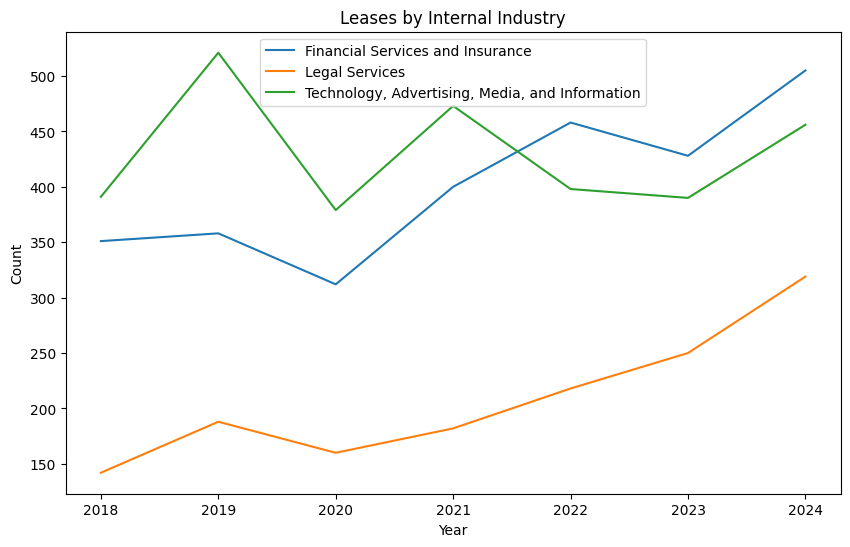

<Figure size 1000x600 with 0 Axes>

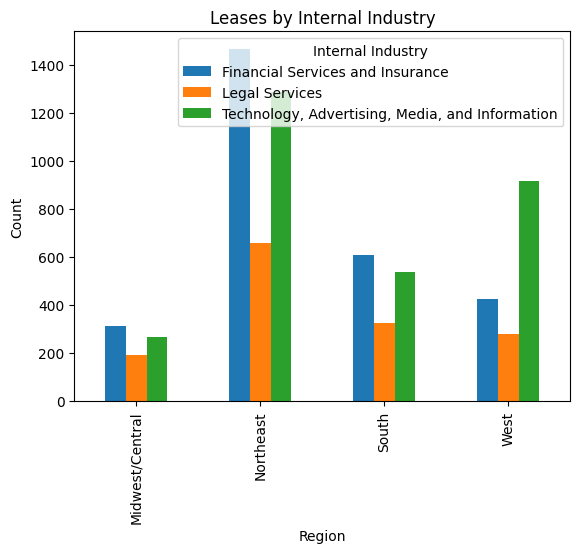

In [37]:
leases_10000 = leases[leases['leasedSF'] > 10000]

important_leases = leases_10000[leases_10000['internal_industry'].isin(['Legal Services', 'Financial Services and Insurance', 'Technology, Advertising, Media, and Information'])]
print(important_leases)
grouped = important_leases.groupby(['year', 'internal_industry']).size().reset_index(name='count')
print(grouped)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for industry in grouped['internal_industry'].unique():
    plt.plot(grouped[grouped['internal_industry'] == industry]['year'], grouped[grouped['internal_industry'] == industry]['count'], label=industry)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Leases by Internal Industry')
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))
important_leases.groupby(['region', 'internal_industry']).size().unstack().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Leases by Internal Industry')
plt.legend(title='Internal Industry')
plt.show()



In [41]:
important_leases['market'].value_counts()


market
Manhattan              1875
Los Angeles             436
Chicago                 408
Northern Virginia       391
Washington D.C.         326
San Francisco           286
Atlanta                 272
Northern New Jersey     242
Dallas/Ft Worth         237
South Bay/San Jose      215
Philadelphia            208
Austin                  199
South Florida           194
Denver                  194
Boston                  189
Seattle                 186
Orange County           175
Houston                 167
Phoenix                 147
Tampa                   140
San Diego               129
Charlotte               118
Raleigh/Durham          107
Southern Maryland        98
Detroit                  85
Baltimore                84
Chicago Suburbs          83
Salt Lake City           48
Nashville                40
Name: count, dtype: int64

In [45]:
important_leases_manhattan = important_leases[important_leases['market'] == 'Manhattan']
important_leases_manhattan['go_stay'] = important_leases_manhattan['transaction_type'].apply(lambda x: 'go' if x in ['New', 'Relocation'] else 'stay')
important_leases_manhattan['go_stay'].value_counts()


C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\471024732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_leases_manhattan['go_stay'] = important_leases_manhattan['transaction_type'].apply(lambda x: 'go' if x in ['New', 'Relocation'] else 'stay')


go_stay
go      1113
stay     762
Name: count, dtype: int64

In [51]:
important_leases_manhattan.describe()


,year,monthsigned,zip,leasedSF,costarID,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
count,1875.000000,1823.000000,1875.000000,1.875000e+03,1.875000e+03,1.875000e+03,1.875000e+03,1875.000000,1875.000000,1875.000000,1.598000e+03,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1598.000000,1598.000000,1.875000e+03
mean,2021.117333,6.360395,10039.145067,5.469142e+04,1.011832e+06,2.443830e+08,3.988888e+07,0.161872,79.995477,77.427810,3.208926e+07,0.069023,85.962340,82.378455,1.009047e+07,0.021695,60.935636,60.189643,4.620682e+06
std,2.025740,3.481977,56.515997,1.076676e+05,2.651482e+06,2.794544e+07,1.111303e+07,0.036995,11.282749,2.827929,7.563025e+06,0.015611,13.236601,2.381138,2.971626e+06,0.006219,5.722350,2.059006,1.663650e+06
min,2018.000000,1.000000,10001.000000,1.000100e+04,2.627000e+03,1.964154e+08,1.816511e+07,0.090814,60.033350,73.739864,1.340337e+07,0.029500,61.100992,79.852772,4.078449e+06,0.009100,44.825281,57.548437,9.938860e+05
25%,2019.000000,3.000000,10011.000000,1.531250e+04,1.570970e+05,2.022501e+08,3.053506e+07,0.122608,63.658846,75.887677,2.563698e+07,0.056300,65.671471,80.652660,7.350508e+06,0.016200,57.708533,58.708796,3.354121e+06
50%,2021.000000,6.000000,10018.000000,2.522400e+04,1.572260e+05,2.552168e+08,3.946452e+07,0.182303,85.140096,77.040137,3.515190e+07,0.075800,92.826289,81.838403,1.100704e+07,0.023500,62.990344,59.319707,4.324015e+06
75%,2023.000000,10.000000,10036.000000,4.755700e+04,1.578635e+05,2.675692e+08,5.092824e+07,0.193236,86.708528,77.602027,3.878802e+07,0.083000,94.170351,82.769759,1.257877e+07,0.027200,65.565136,61.012123,5.835370e+06
max,2024.000000,12.000000,10285.000000,1.463234e+06,1.932442e+07,2.683833e+08,5.457790e+07,0.203839,94.191224,84.746663,4.092899e+07,0.086900,99.642941,88.438174,1.435339e+07,0.030700,68.067085,65.436381,9.393220e+06


In [ ]:
plt.figure(figsize=(10, 6))
for industry in grouped['internal_industry'].unique():
    plt.plot(grouped[grouped['internal_industry'] == industry]['year'], grouped[grouped['internal_industry'] == industry]['count'], label=industry)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Leases by Internal Industry')
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))
important_leases.groupby(['region', 'internal_industry']).size().unstack().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Leases by Internal Industry')
plt.legend(title='Internal Industry')
plt.show()

In [55]:
important_leases_manhattan.select_dtypes(include='number').columns

Index(['year', 'monthsigned', 'zip', 'leasedSF', 'costarID', 'RBA',
       'available_space', 'availability_proportion', 'internal_class_rent',
       'overall_rent', 'direct_available_space',
       'direct_availability_proportion', 'direct_internal_class_rent',
       'direct_overall_rent', 'sublet_available_space',
       'sublet_availability_proportion', 'sublet_internal_class_rent',
       'sublet_overall_rent', 'leasing'],
      dtype='object')

# overall_rent, avg_occupancy_proportion, CBD_suburban, unemployment rate




In [65]:
missing_percent = unemployment.isnull().mean() * 100
print(missing_percent)

year                 0.0
quarter              0.0
month                0.0
state                0.0
unemployment_rate    0.0
dtype: float64


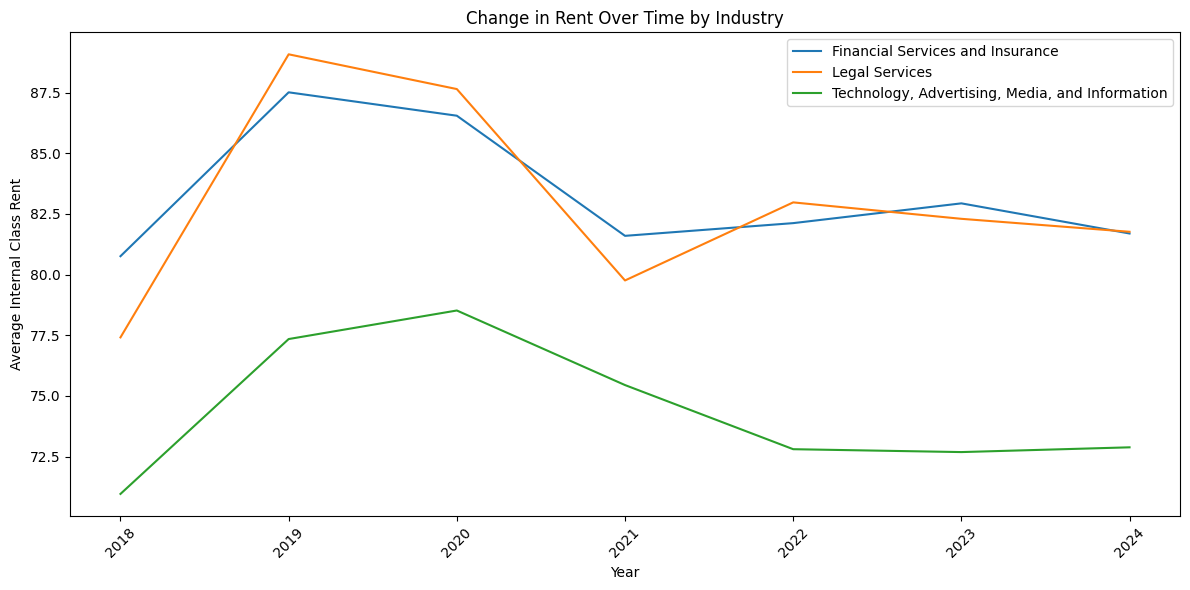

In [63]:
import matplotlib.pyplot as plt

# First, aggregate the data: average rent per industry per year
grouped = important_leases_manhattan.groupby(['internal_industry', 'year'])['internal_class_rent'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))

# Get unique industries
industries = grouped['internal_industry'].unique()

# Plot each industry's trend
for industry in industries:
    industry_data = grouped[grouped['internal_industry'] == industry]
    industry_data = industry_data.sort_values('year')  # Ensure it's sorted
    plt.plot(industry_data['year'], industry_data['internal_class_rent'], label=industry)

# Labeling
plt.xlabel('Year')
plt.ylabel('Average Internal Class Rent')
plt.title('Change in Rent Over Time by Industry')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\1738392575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_leases_manhattan['go_stay_encoded'] = label_encoder.fit_transform(important_leases_manhattan['go_stay'])


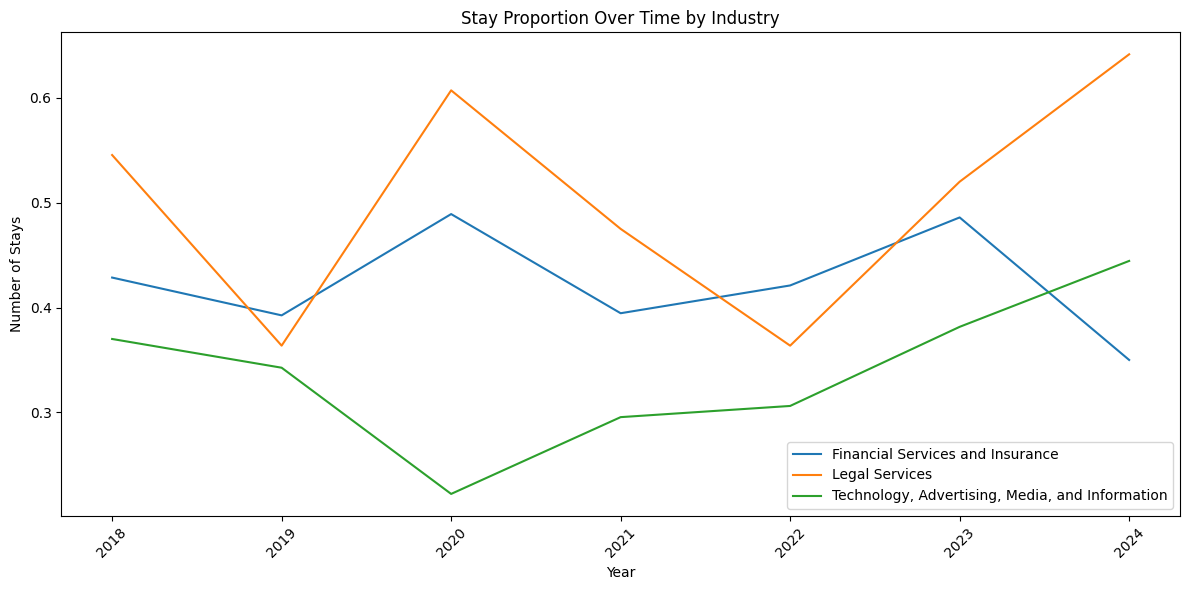

In [84]:
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# Encode go_stay feature

label_encoder = LabelEncoder()
important_leases_manhattan['go_stay_encoded'] = label_encoder.fit_transform(important_leases_manhattan['go_stay'])

# First, aggregate the data: average rent per industry per year
grouped = important_leases_manhattan.groupby(['internal_industry', 'year'])['go_stay_encoded'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))

# Get unique industries
industries = grouped['internal_industry'].unique()

# Plot each industry's trend
for industry in industries:
    industry_data = grouped[grouped['internal_industry'] == industry]
    industry_data = industry_data.sort_values('year')  # Ensure it's sorted
    plt.plot(industry_data['year'], industry_data['go_stay_encoded'], label=industry)

# Labeling
plt.xlabel('Year')
plt.ylabel('Number of Stays')
plt.title('Stay Proportion Over Time by Industry')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# import matplotlib.pyplot as plt

# # Calculate the percentage of 'go' (0) in go_stay_encoded
# percentage_go = grouped[grouped['go_stay_encoded'] == 0]['go_stay_encoded'].count() / grouped['go_stay_encoded'].count() * 100

# # Calculate the percentage of 'stay' (1) in go_stay_encoded
# percentage_stay = grouped[grouped['go_stay_encoded'] == 1]['go_stay_encoded'].count() / grouped['go_stay_encoded'].count() * 100

# # Plot the percentages
# plt.figure(figsize=(12, 6))
# plt.bar(['Go', 'Stay'], [percentage_go, percentage_stay])
# plt.xlabel('Go-Stay')
# plt.ylabel('Percentage')
# plt.title('Percentage of Go-Stay')
# plt.show()


In [74]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create "Go-Stay" label
df = important_leases_manhattan.copy()

# Create contingency table
contingency = pd.crosstab(df['internal_industry'], df['go_stay'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 25.598535302441647
p-value: 2.7627951609897905e-06


some industries are statistically more likely to move ("Go") than others

In [81]:
# COMAPRE PRE POST SQ BUT SAMPLE TOO SMALL

# from scipy.stats import f_oneway
# import pandas as pd

# # Assume your original DataFrame is df
# df = important_leases_manhattan.copy()

# # Create 'period' column for grouping
# df['year'] = pd.to_datetime(df['monthsigned']).dt.year
# df['period'] = df['year'].apply(lambda x: 'pre' if x <= 2019 else ('post' if x >= 2022 else 'mid'))

# # Filter to only include 'pre' and 'post' periods (skip 2020–2021 as transitional)
# df_filtered = df[df['period'].isin(['pre', 'post'])].dropna(subset=['leasedSF'])

# # Group leasedSF by period
# pre_leases = df_filtered[df_filtered['period'] == 'pre']['leasedSF']
# post_leases = df_filtered[df_filtered['period'] == 'post']['leasedSF']

# # Run ANOVA
# f_stat, p_val = f_oneway(pre_leases, post_leases)

# print("ANOVA F-statistic:", f_stat)
# print("p-value:", p_val)



ANOVA F-statistic: nan
p-value: nan


C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\415657839.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = f_oneway(pre_leases, post_leases)


In [76]:
from scipy.stats import f_oneway

# Filter for valid rent data
df_filtered = df[['internal_industry', 'internal_class_rent']].dropna()

# Group data
grouped_rent = [group['internal_class_rent'].values for name, group in df_filtered.groupby('internal_industry')]

# ANOVA
f_stat, p_val = f_oneway(*grouped_rent)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)


ANOVA F-statistic: 134.80545232035868
p-value: 2.0188185537109947e-55


at least one industry has significantly different rent levels

In [83]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

# Ensure 'year' exists
df['year'] = pd.to_datetime(df['monthsigned'], errors='coerce').dt.year

# Create 'period' column
df['period'] = df['year'].apply(lambda x: 'pre' if x <= 2019 else ('post' if x >= 2022 else 'mid'))

# Drop rows with missing CBD_suburban
df_clean = df[df['CBD_suburban'].isin(['CBD', 'Suburban'])].copy()

# Count CBD leases for each period
pre_cbd = df_clean[(df_clean['period'] == 'pre') & (df_clean['CBD_suburban'] == 'CBD')].shape[0]
pre_total = df_clean[df_clean['period'] == 'pre'].shape[0]

post_cbd = df_clean[(df_clean['period'] == 'post') & (df_clean['CBD_suburban'] == 'CBD')].shape[0]
post_total = df_clean[df_clean['period'] == 'post'].shape[0]

# Print counts for debugging
print(f"Pre-COVID: {pre_cbd}/{pre_total} CBD leases")
print(f"Post-COVID: {post_cbd}/{post_total} CBD leases")

# Check for zero total counts
if pre_total == 0 or post_total == 0:
    print("❌ Cannot run proportions_ztest: one of the sample sizes is 0.")
else:
    counts = [pre_cbd, post_cbd]
    nobs = [pre_total, post_total]

    z_stat, p_val = proportions_ztest(counts, nobs)

    print("✅ Z-statistic:", z_stat)
    print("✅ p-value:", p_val)


Pre-COVID: 1823/1823 CBD leases
Post-COVID: 0/0 CBD leases
❌ Cannot run proportions_ztest: one of the sample sizes is 0.


In [67]:
important_leases_manhattan[['go_stay', 'go_stay_encoded']].head(10)

,go_stay,go_stay_encoded
1417,stay,1
1418,go,0
1420,go,0
1426,go,0
1428,stay,1
1431,go,0
1437,go,0
1461,stay,1
1499,stay,1
1512,go,0


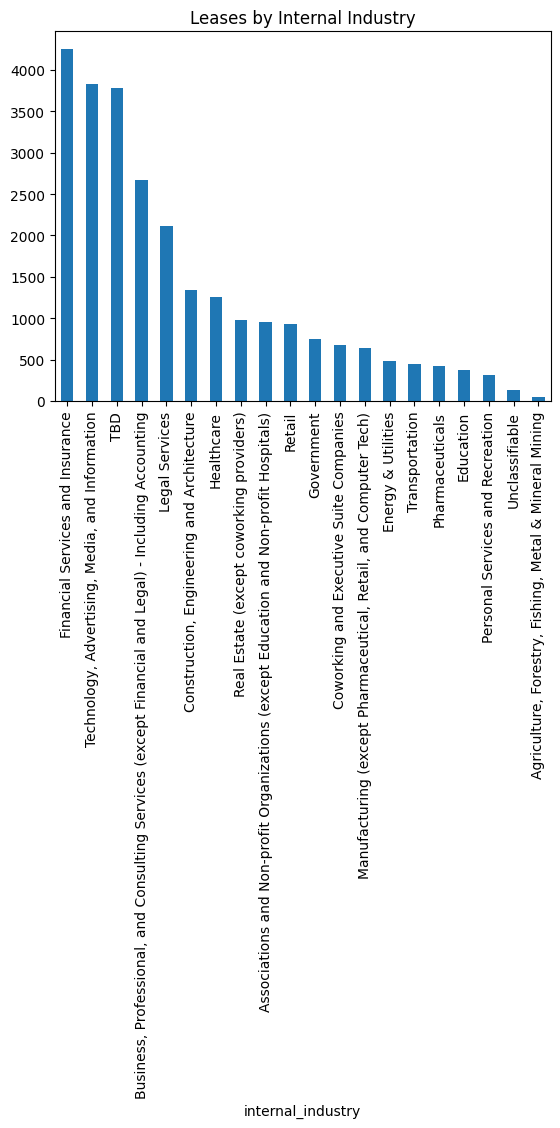

In [16]:
#leases['internal_industry'].unique()
import matplotlib.pyplot as plt

leases['internal_industry'].value_counts().plot(kind='bar')
plt.title('Leases by Internal Industry')
plt.show()

## Time Series Forecasting
to detect sector specific recovery/decline patterns

In [91]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and preprocess the data
#df = pd.read_csv("leasing_data.csv", parse_dates=['monthsigned'])
df = important_leases_manhattan.copy()
#print(df.head())
df['monthsigned'] = pd.to_datetime(df['monthsigned'])
df.set_index('monthsigned', inplace=True)

# Aggregate monthly leasedSF per industry
monthly_lease = df.groupby([pd.Grouper(freq='M'), 'internal_industry'])['leasedSF'].sum().reset_index()

# Filter for a specific industry (e.g., Tech)
tech_lease = monthly_lease[monthly_lease['internal_industry'] == 'Tech']
tech_lease = tech_lease.rename(columns={'monthsigned': 'ds', 'leasedSF': 'y'})

# --- ARIMA ---
ts = tech_lease.set_index('ds')['y'].asfreq('MS').fillna(method='ffill')
print(ts.head())
arima_model = ARIMA(ts, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=12)

# --- Prophet ---
prophet_model = Prophet()
prophet_model.fit(tech_lease)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

prophet_model.plot(forecast)
plt.title("Prophet Forecast: LeasedSF - Tech Industry")
plt.show()


C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\3487911764.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_lease = df.groupby([pd.Grouper(freq='M'), 'internal_industry'])['leasedSF'].sum().reset_index()
C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\3487911764.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = tech_lease.set_index('ds')['y'].asfreq('MS').fillna(method='ffill')
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:534: RuntimeWarning: invali

Series([], Freq: MS, Name: y, dtype: float64)


IndexError: index 0 is out of bounds for axis 0 with size 0

## Classification Model for Lease Intent


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Prepare data
cols = ['leasedSF', 'CBD_suburban', 'internal_industry', 'internal_class']#, 'avg_occupancy_proportion', 'Unemployment_Rate']
df_class = df.dropna(subset=cols + ['transaction_type'])

le = LabelEncoder()
df_class['industry_enc'] = le.fit_transform(df_class['internal_industry'])
df_class['class_enc'] = le.fit_transform(df_class['internal_class'])
df_class['CBD_enc'] = le.fit_transform(df_class['CBD_suburban'])
df_class['target'] = le.fit_transform(df_class['transaction_type'])

X = df_class[['leasedSF', 'CBD_enc', 'industry_enc', 'class_enc']]#, 'avg_occupancy_proportion', 'Unemployment_Rate']]
y = df_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(criterion = 'gini', max_depth=5, random_state=42)
rf.fit(X_train, y_train)
print("RF Classification Report:\n", classification_report(y_test, rf.predict(X_test)))

# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
print("Logistic Regression Report:\n", classification_report(y_test, lr.predict(X_test)))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
print("XGBoost Report:\n", classification_report(y_test, xgb.predict(X_test)))


C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\817986930.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['industry_enc'] = le.fit_transform(df_class['internal_industry'])
C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\817986930.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['class_enc'] = le.fit_transform(df_class['internal_class'])
C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\817986930.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

RF Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           2       0.50      0.10      0.16        83
           3       0.37      0.93      0.53       137
           4       0.36      0.07      0.12        70
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.38       374
   macro avg       0.15      0.14      0.10       374
weighted avg       0.31      0.38      0.25       374

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        83
           3       0.37      1.00      0.54       137
           4       0.00      0.00      0.00        70
           5       0.0

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

## Market clustering
grouping similar markets

In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

# Use relevant features
df = important_leases.copy()
cluster_df = df[['market', 'leasedSF', 'overall_rent']]#, 'avg_occupancy_proportion', 'Unemployment_Rate']]
cluster_df = cluster_df.dropna().groupby('market').mean()
print(cluster_df.head())    
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)
print(X_scaled[:5])
# --- KMeans ---
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)



               leasedSF  overall_rent
market                               
Atlanta    43966.930147     29.914624
Austin     55015.778894     42.487821
Baltimore  35126.178571     24.167596
Boston     80805.783069     41.151134
Charlotte  47417.423729     30.499232
[[-0.22894316 -0.47439359]
 [ 0.61772576  0.42842995]
 [-0.90640647 -0.88706126]
 [ 2.5940036   0.33244858]
 [ 0.0354668  -0.43241556]]


c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
# Get the mean of each feature per cluster
cluster_profiles = cluster_df.groupby('kmeans_cluster').mean()

# Display the profiles
print(cluster_profiles)


                    leasedSF  overall_rent
kmeans_cluster                            
0               53642.465669     36.097115
1               37370.742856     29.571466
2               58760.758136     74.541818
3               75931.810889     41.260035


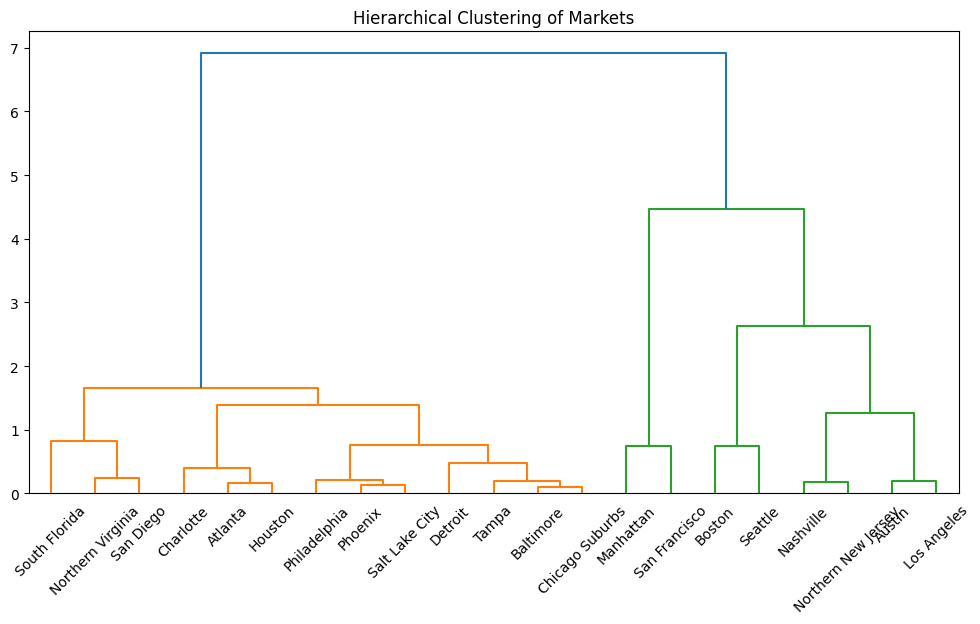

In [119]:
# --- Hierarchical ---
linked = linkage(X_scaled, method='ward', metric = 'euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=cluster_df.index.tolist())
plt.title("Hierarchical Clustering of Markets")
plt.show()

## Spatial Trends

In [120]:
%pip install plotly

In [110]:
import geopandas as gpd
import plotly.express as px

# Create metrics
df['rent_per_sf'] = df['overall_rent'] / df['leasedSF']
geo_df = df.groupby('zip').agg({
    'leasedSF': 'sum',
    'overall_rent': 'mean',
    'rent_per_sf': 'mean',
    'avg_occupancy_proportion': 'mean'
}).reset_index()

# ZIP code level choropleth (assuming geojson or lat/long data available)
fig = px.scatter_geo(geo_df,
    locations="zip",
    locationmode="USA-states",
    color="rent_per_sf",
    size="leasedSF",
    scope="usa",
    title="Spatial Trends in Office Rent per SF")
fig.show()


ModuleNotFoundError: No module named 'plotly'

## AI/Automation changes

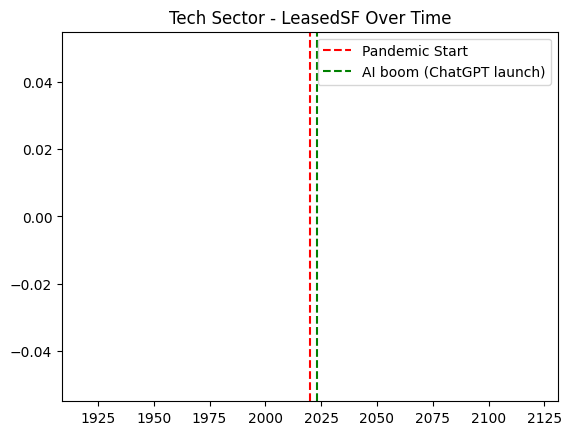

In [112]:
# Compare leasedSF for Tech industry over time
ai_df = df[df['internal_industry'] == 'Tech'].copy()
ai_df['year'] = pd.to_datetime(ai_df['monthsigned']).dt.year
ai_yearly = ai_df.groupby('year')['leasedSF'].sum().reset_index()

plt.plot(ai_yearly['year'], ai_yearly['leasedSF'], marker='o')
plt.title("Tech Sector - LeasedSF Over Time")
plt.axvline(2020, color='red', linestyle='--', label='Pandemic Start')
plt.axvline(2023, color='green', linestyle='--', label='AI boom (ChatGPT launch)')
plt.legend()
plt.show()


## Feature Engineering

In [115]:
df = important_leases_manhattan.copy()
df['net_absorption'] = df['leasedSF'] - df['available_space']
#df['rent_efficiency'] = df['overall_rent'] / df['avg_occupancy_proportion']
df['expansion_flag'] = df['transaction_type'].str.contains('expan', case=False, na=False).astype(int)

metrics = df.groupby(['internal_industry', 'market']).agg({
    'leasedSF': 'mean',
    'net_absorption': 'mean',
    'overall_rent': 'mean',
    #'rent_efficiency': 'mean',
    'expansion_flag': 'mean'
}).reset_index()

metrics = metrics.sort_values(by='expansion_flag', ascending=False)
print(metrics.head())


                                 internal_industry     market      leasedSF  \
0                 Financial Services and Insurance  Manhattan  49431.097837   
1                                   Legal Services  Manhattan  61794.843416   
2  Technology, Advertising, Media, and Information  Manhattan  59686.146067   

   net_absorption  overall_rent  expansion_flag  
0   -4.206759e+07     77.258288        0.223481  
1   -4.136986e+07     77.289953        0.199288  
2   -3.566057e+07     77.754206        0.136437  


In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

# Ensure 'year' exists
df['year'] = pd.to_datetime(df['monthsigned'], errors='coerce').dt.year

# Create 'period' column
df['period'] = df['year'].apply(lambda x: 'pre' if x <= 2019 else ('post' if x >= 2022 else 'mid'))

# Drop rows with missing CBD_suburban
df_clean = df[df['CBD_suburban'].isin(['CBD', 'Suburban'])].copy()

# Count CBD leases for each period
pre_cbd = df_clean[(df_clean['period'] == 'pre') & (df_clean['CBD_suburban'] == 'CBD')].shape[0]
pre_total = df_clean[df_clean['period'] == 'pre'].shape[0]

post_cbd = df_clean[(df_clean['period'] == 'post') & (df_clean['CBD_suburban'] == 'CBD')].shape[0]
post_total = df_clean[df_clean['period'] == 'post'].shape[0]

# Print counts for debugging
print(f"Pre-COVID: {pre_cbd}/{pre_total} CBD leases")
print(f"Post-COVID: {post_cbd}/{post_total} CBD leases")

# Check for zero total counts
if pre_total == 0 or post_total == 0:
    print("❌ Cannot run proportions_ztest: one of the sample sizes is 0.")
else:
    counts = [pre_cbd, post_cbd]
    nobs = [pre_total, post_total]

    z_stat, p_val = proportions_ztest(counts, nobs)

    print("✅ Z-statistic:", z_stat)
    print("✅ p-value:", p_val)


Pre-COVID: 1823/1823 CBD leases
Post-COVID: 0/0 CBD leases
❌ Cannot run proportions_ztest: one of the sample sizes is 0.


* How Is Office Class Impacting Leasing?
Compare Class A vs B/C buildings:

leasedSF

availability_proportion

internal_class_rent trends

Determine if there’s a flight to quality, where firms vacate older spaces for top-tier buildings.

Example insight: Class A vacancy might be tightening while older stock is struggling to lease—repositioning opportunities.

Are Companies Reacting to Cost Pressures?
Track rent trends and see who is moving into cheaper space or downsizing:

internal_class_rent

direct_internal_class_rent

sublet_internal_class_rent

Example insight: Some firms may be moving laterally in quality but reducing cost through subleases or downsizing square footage.

Market Overview
Total leasedSF by quarter

Rent and availability by class and submarket

Industry Deep-Dive
Legal, Financial, and Tech sector leasing trends

Occupancy and sublet behaviors

Spatial Patterns
Heatmaps or charts showing growth/contraction by internal_submarket

Strategic Recommendations
Which industries are expanding?

Which submarkets are rebounding?

Where are the best value plays for clients?

## Mapping

In [19]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [18]:
import folium
import numpy as np

zipcodes = dataset[hsales["ZIP CODE"]>0]
zipcodes['ZIP']=zipcodes['ZIP CODE'].astype(str)

boroughs = zipcodes[['ZIP','BOROUGH']]
boroughs.drop_duplicates('ZIP', inplace=True)

us_zipcodes = pd.read_csv("../input/nyc-zipcode-geodata/uszipcodes_geodata.txt", delimiter=',', dtype=str)
zipcodes_agg=pd.merge(zipcodes.groupby('ZIP').agg(np.mean), us_zipcodes, how='left', on='ZIP')
zipcodes_agg = pd.merge(zipcodes_agg, boroughs, how='left', on='ZIP')
zipcodes_agg.loc[116,'LAT']="40.6933"
zipcodes_agg.loc[116,'LNG']="-73.9925"

from folium.plugins import MarkerCluster # for clustering the markers
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
map.choropleth(geo_data="../input/nyc-zipcode-geodata/nyc-zip-code-tabulation-areas-polygons.geojson", # I found this NYC zipcode boundaries by googling 
             data=zipcodes_agg, # my dataset
             columns=['ZIP', 'SALE PRICE'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='SALE PRICE')

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(map) # create marker clusters
for i in range(zipcodes_agg.shape[0]):
    location = [zipcodes_agg['LAT'][i],zipcodes_agg['LNG'][i]]
    tooltip = "Zipcode:{}<br> Borough: {}<br> Click for more".format(zipcodes_agg["ZIP"][i], zipcodes_agg['BOROUGH'][i])
    folium.Marker(location, 
                  popup="""<i>Mean sales price: </i> <br> <b>${}</b> <br>
                  <i>mean total units: </i><b><br>{}</b><br>
                  <i>mean square feet: </i><b><br>{}</b><br>""".format(round(zipcodes_agg['SALE PRICE'][i],2), round(zipcodes_agg['TOTAL UNITS'][i],2), round(zipcodes_agg['GROSS SQUARE FEET'][i],2)), 
                  tooltip=tooltip).add_to(marker_cluster)
map

C:\Users\nia_4\AppData\Local\Temp\ipykernel_27116\3237691196.py:26: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf['geometry'] = gpd.points_from_xy(gdf.Longitude, gdf.Latitude)


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.